In [115]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sb

pre processing the data

In [116]:
def data_processing_open(data):
    print("Pre-Processing the Data:\n\n")
    # Separate data into training and test sets based on date
    data_training = data[data['Date']<'2021-01-01'].copy()
    data_test = data[data['Date']>='2021-01-01'].copy()

    #                ["Date", "Open", "Close", "High", "Low", "Volume","Adj Close"] 
    data = data.drop(["Date", "Adj Close", "Close", "High",  "Low", "Volume"], axis = 1)
    data_training=data_training.drop(["Date", "Adj Close", "Close", "High",  "Low", "Volume"], axis = 1)
    data_test=data_test.drop(["Date", "Adj Close", "Close", "High",  "Low", "Volume"], axis = 1)

    print(" Column used for predicting figures from 2021 onwards ")
    print(data_training.head())
    # Scale the data using Min-Max scaling
    scalar = MinMaxScaler()
    scaled_data = scalar.fit_transform(data)
    scaled_training_data=scalar.fit_transform(data_training)
    scaled_test_data=scalar.fit_transform(data_test)
    
    return scaled_training_data,scaled_test_data,data,scalar


In [117]:

def data_processing_high(data):
    print("Pre-Processing the Data:\n\n")
    # Separate data into training and test sets based on date
    data_training = data[data['Date']<'2021-01-01'].copy()
    data_test = data[data['Date']>='2021-01-01'].copy()

    #                ["Date", "Open", "Close", "High", "Low", "Volume","Adj Close"] 
    data = data.drop(["Date", "Adj Close", "Open", "Close",  "Low", "Volume"], axis = 1)
    data_training=data_training.drop(["Date", "Adj Close", "Open", "Close",  "Low", "Volume"], axis = 1)
    data_test=data_test.drop(["Date", "Adj Close", "Open", "Close",  "Low", "Volume"], axis = 1)

    print(" Column used for predicting figures from 2021 onwards ")
    print(data_training.head())
    # Scale the data using Min-Max scaling
    scalar = MinMaxScaler()
    scaled_data = scalar.fit_transform(data)
    scaled_training_data=scalar.fit_transform(data_training)
    scaled_test_data=scalar.fit_transform(data_test)
    
    return scaled_training_data,scaled_test_data,data,scalar


In [118]:

def data_processing_low(data):
    print("Pre-Processing the Data:\n\n")
    # Separate data into training and test sets based on date
    data_training = data[data['Date']<'2021-01-01'].copy()
    data_test = data[data['Date']>='2021-01-01'].copy()

    #                ["Date", "Open", "Close", "High", "Low", "Volume","Adj Close"] 
    data = data.drop(["Date", "Adj Close", "Open", "Close",  "High", "Volume"], axis = 1)
    data_training=data_training.drop(["Date", "Adj Close", "Open", "Close",  "High", "Volume"], axis = 1)
    data_test=data_test.drop(["Date", "Adj Close", "Open", "Close",  "High", "Volume"], axis = 1)

    print(" Column used for predicting figures from 2021 onwards ")
    print(data_training.head())
    # Scale the data using Min-Max scaling
    scalar = MinMaxScaler()
    scaled_data = scalar.fit_transform(data)
    scaled_training_data=scalar.fit_transform(data_training)
    scaled_test_data=scalar.fit_transform(data_test)
    
    return scaled_training_data,scaled_test_data,data,scalar


In [119]:

def data_processing_volume(data):
    print("Pre-Processing the Data:\n\n")
    # Separate data into training and test sets based on date
    data_training = data[data['Date']<'2021-01-01'].copy()
    data_test = data[data['Date']>='2021-01-01'].copy()

    #                ["Date", "Open", "Close", "High", "Low", "Volume","Adj Close"] 
    data = data.drop(["Date", "Adj Close", "Open", "Close",  "High", "Low"], axis = 1)
    data_training=data_training.drop(["Date", "Adj Close", "Open", "Close",  "High", "Low"], axis = 1)
    data_test=data_test.drop(["Date", "Adj Close", "Open", "Close",  "High", "Low"], axis = 1)

    print(" Column used for predicting figures from 2021 onwards ")
    print(data_training.head())
    # Scale the data using Min-Max scaling
    scalar = MinMaxScaler()
    scaled_data = scalar.fit_transform(data)
    scaled_training_data=scalar.fit_transform(data_training)
    scaled_test_data=scalar.fit_transform(data_test)
    
    return scaled_training_data,scaled_test_data,data,scalar


splits the scaled training and test data into input-output pairs for time-series prediction. It creates sequences of two consecutive data points as inputs and their corresponding next data point as output. These sequences are formed for both training and testing data. 

In [120]:
def train_test_split_data(scaled_training_data, scaled_test_data):
    x_train = []
    y_train = []
    x_test = []
    y_test = []

    #index for splitting the training and test data based on the split percent
    split_index_train = round(len(scaled_training_data) * 0.80)
    split_index_test = round(len(scaled_test_data) * 0.80)

    # Iterate over the training data to create input sequences (x_train) and corresponding outputs (y_train)
    for i in range(2, split_index_train):
        tTemp = [scaled_training_data[i - 2], scaled_training_data[i - 1]]
        x_train.append(tTemp)

    for j in scaled_training_data[2: split_index_train]:
        y_train.append(j)

    # Iterate over the test data to create input sequences (x_test) and corresponding outputs (y_test)
    for i in range(2, split_index_test):
        tTemp = [scaled_test_data[i - 2], scaled_test_data[i - 1]]
        x_test.append(tTemp)

    for j in scaled_test_data[2: split_index_test]:
        y_test.append(j)

    
    # Convert lists to numpy arrays
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    x_train = np.array(x_train)
    x_test = np.array(x_test)

    print('Shapes:\n xTrain, yTrain, xTest, yTest', x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    return x_train, y_train, x_test, y_test


loss calculation

In [121]:
def loss( actual,predicted):
    m=np.square(actual - predicted)
    return np.mean(m)

Relu activation function

In [122]:
def relu_activation_function(input, flag=1):
    if(flag==1):
        return np.maximum(input, 0)
    else:
        return (input > 0)

forward_propagation:

 It iterates through each time step in the input data, calculates the weighted sum of inputs to the hidden layer and hidden to output layer, applies an activation function to compute the next hidden state, and stores the hidden states in a list, and calculates the output of the hidden layer.

In [123]:
def forward_propagation(input, hidden_neurons, input_to_hidden_weights, hidden_to_hidden_weights, hidden_to_output_weights):
    output_hidden_states = []
    output_hidden_states.append(np.zeros((hidden_neurons, 1)))  # Initial hidden state

    step = 0

    while step < input.shape[0]:
        # weighted sum of inputs to hidden layer and hidden to output layer
        weights_sum = (input_to_hidden_weights @ input[[step]].T) + (hidden_to_output_weights @ output_hidden_states[-1])
        
        # Applying activation function to calculate the next hidden state
        next_hidden_state = relu_activation_function(weights_sum)
        
        # Append next hidden state
        output_hidden_states.append(next_hidden_state)
        
        step = step + 1

    # output of hidden layer
    hidden_output = hidden_to_hidden_weights @ output_hidden_states[-1]

    return output_hidden_states, hidden_output


backward_propagation:

calculate the gradients of the loss function with respect to the model's parameters using backpropagation through time. It updates the weights using these gradients and a specified learning rate.

In [124]:
def backward_propagation(input, output, hidden_states, hidden_output, input_to_hidden_weights, hidden_to_hidden_weights, hidden_to_output_weights, lr):
    #loss between actual output and predicted output
    loss_value = loss(output, hidden_output)

    # Initialize gradients for weights
    grad_input_to_hidden_weights = np.zeros(input_to_hidden_weights.shape)
    grad_hidden_to_hidden_weights = np.zeros(hidden_to_hidden_weights.shape)
    grad_hidden_to_output_weights = np.zeros(hidden_to_output_weights.shape)

    #error slope and hidden states slope
    error_slope = np.dot(hidden_to_hidden_weights.T, loss_value)
    hidden_states_slope = error_slope * relu_activation_function(hidden_states[-1], flag=0)

    # Update weights gradients using BTT
    for step in reversed(range(input.shape[0])):
        temp = hidden_states_slope @ hidden_states[step - 1].T
        grad_hidden_to_output_weights = grad_hidden_to_output_weights + temp
        temp = hidden_states_slope @ input[[step - 1]]
        grad_input_to_hidden_weights = grad_input_to_hidden_weights + temp

    temp = (hidden_output - output) @ hidden_states[-1].T
    grad_hidden_to_hidden_weights = grad_hidden_to_hidden_weights + temp

    # Update weights using gradients and learning rate
    input_to_hidden_weights = input_to_hidden_weights - lr * grad_input_to_hidden_weights
    hidden_to_hidden_weights = hidden_to_hidden_weights - lr * grad_hidden_to_hidden_weights
    hidden_to_output_weights = hidden_to_output_weights - lr * grad_hidden_to_output_weights
    
    return input_to_hidden_weights, hidden_to_hidden_weights, hidden_to_output_weights


Train the model using forward and backward propagation for a specified number of iterations say 50. It initializes model parameters and weights randomly, performs forward and backward propagation iteratively, and returns the trained model's results and parameters.

In [125]:
def train_model( x_train, y_train, x_test, y_test, i_input_neurons = 1, i_hidden_neurons = 10, i_output_neurons = 1, lr = 0.01, iterations = 50):
    # Initialize weights randomly
    input_to_hidden_weights = (np.random.uniform(0, 1, (i_hidden_neurons, i_input_neurons)) / 2)
    hidden_to_hidden_weights = (np.random.uniform(0, 1, (i_output_neurons, i_hidden_neurons)) / 2)
    hidden_to_output_weights = (np.random.uniform(0, 1, (i_hidden_neurons, i_hidden_neurons)) / 2)

    index = 0
    while(index < iterations):
        if(index == iterations - 1):
            train_results = []

        for stage in range(x_train.shape[0]):
            # Perform forward propagation
            t_hidden_states, t_hidden_output = forward_propagation(x_train[stage], i_hidden_neurons,input_to_hidden_weights,hidden_to_hidden_weights,hidden_to_output_weights)
            
            # Append hidden output to train results for final iteration
            if(index == iterations - 1):
                train_results.append(t_hidden_output.tolist()[0])
            
            # Perform backward propagation
            input_to_hidden_weights,hidden_to_hidden_weights,hidden_to_output_weights = backward_propagation(x_train[stage], y_train[stage], t_hidden_states, t_hidden_output,input_to_hidden_weights,hidden_to_hidden_weights,hidden_to_output_weights,lr)
        
        index = index + 1
    
    # Converting train results to numpy array 
    train_results = np.array(train_results).T[0]

    return train_results,t_hidden_output,i_hidden_neurons,input_to_hidden_weights,hidden_to_hidden_weights,hidden_to_output_weights


test_model: 

performs forward propagation on the test data using the trained model parameters. It returns the predicted output values for the test data.

In [126]:
def test_model(x_test,t_hidden_output,hidden_neurons,input_to_hidden_weights,hidden_to_hidden_weights,hidden_to_output_weights):
    test_results = []

    for stage in range(x_test.shape[0]):
         # Perform forward propagation and obtain predictions
        t_hidden_states, t_hidden_output = forward_propagation(x_test[stage], hidden_neurons,input_to_hidden_weights,hidden_to_hidden_weights,hidden_to_output_weights)
        # Append the predicted output 
        test_results.append(t_hidden_output.tolist()[0])

    # Converting test results to np array
    test_results = np.array(test_results).T[0]

    return test_results


Calculate and print the Mean Squared Error (MSE) and Mean Absolute Error (MAE) for both training and testing data. It takes the actual training and testing outputs along with the predicted outputs for both sets

In [127]:
def model_error(y_train,train_results,test_results,y_test):
    print("Train MSE: ", mean_squared_error(y_train, train_results))
    print("Train MAE: ", mean_absolute_error(y_train, train_results))
    print("Test MSE: ", mean_squared_error(y_test, test_results))
    print("Test MAE: ", mean_absolute_error(y_test, test_results))

Transform the scaled prediction results back to the original scale using the min_max_scaler.Then calculates and prints model errors using model_error function, and plot the actual training data, actual stock prices, and test prediction output.

In [128]:
def model_error_performance(train_results, test_results, y_train, y_test, processed_data, min_max_scaler):
    # Inverse transform scaled data to original scale
    train_results = min_max_scaler.inverse_transform(train_results.reshape(-1, 1))
    test_results = min_max_scaler.inverse_transform(test_results.reshape(-1, 1))
    y_train = min_max_scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = min_max_scaler.inverse_transform(y_test.reshape(-1, 1))

    # printing model errors
    model_error(y_train, train_results, test_results, y_test)

    # Plot
    plt.figure(figsize=(5, 5))
    plt.ylabel("Stock Price")
    plt.xlabel("No. of days")

    # actual training data
    plt.plot(train_results, label="Training output")
    
    # actual stock prices
    plt.plot(processed_data, label="Actual Price")
    
    # test prediction output
    test_results = [i for i in test_results]
    test_results.insert(0, train_results[-1])
    plt.plot([i for i in range(len(train_results) - 1, len(train_results) + len(test_results) - 1)], test_results, label="Test prediction Output")
    plt.legend()
    plt.grid()
    plt.show()


In [129]:
def helper_func_open(data):
    #parameters taken
    lr= 0.01
    tItns = [100, 150]
    tNeurons = [10, 12]
    epochs = list()
    neurons_list = list()

    for iterations in tItns:
        for neurons in tNeurons:
            # Store training parameters
            epochs.append(iterations)
            neurons_list.append(neurons)

            print(f'Learning rate: {lr}')
            print(f'iterations: {iterations}')

            # Split Data into Train and Test Data
            scaled_training_data,scaled_test_data,processed_data,min_max_scaler = data_processing_open(data)
            x_train, y_train, x_test, y_test= train_test_split_data(scaled_training_data,scaled_test_data)
            # Train the model
            train_results,t_hidden_output,hidden_neurons,input_to_hidden_weights,hidden_to_hidden_weights,hidden_to_output_weights = train_model( x_train, y_train, x_test, y_test, i_input_neurons = 1, i_hidden_neurons = neurons, i_output_neurons = 1, lr=0.01, iterations = iterations)
            # Test the model
            test_results = test_model(x_test,t_hidden_output,hidden_neurons,input_to_hidden_weights,hidden_to_hidden_weights,hidden_to_output_weights)
            # Print predictions
            print("Predictions for the test data:")
            print(test_results)
            # Evaluate and plot model performance   
            model_error_performance(train_results,test_results,y_train,y_test,processed_data,min_max_scaler)
            
            # Update the result metrics
            train_results = min_max_scaler.inverse_transform(train_results.reshape(-1,1))
            test_results = min_max_scaler.inverse_transform(test_results.reshape(-1,1))
            y_train = min_max_scaler.inverse_transform(y_train.reshape(-1,1))
            y_test = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

In [130]:
def helper_func_high(data):
    #parameters taken
    lr= 0.01
    tItns = [100, 150]
    tNeurons = [10, 12]
    
    epochs = list()
    neurons_list = list()

    for iterations in tItns:
        for neurons in tNeurons:
            # Storing the training parameters
            epochs.append(iterations)
            neurons_list.append(neurons)

            print(f'Learning rate: {lr}')
            print(f'iterations: {iterations}')

            # Split Data into Train and Test Data
            scaled_training_data,scaled_test_data,processed_data,min_max_scaler = data_processing_high(data)
            x_train, y_train, x_test, y_test= train_test_split_data(scaled_training_data,scaled_test_data)
            
            # Train the model
            train_results,t_hidden_output,hidden_neurons,input_to_hidden_weights,hidden_to_hidden_weights,hidden_to_output_weights = train_model( x_train, y_train, x_test, y_test, i_input_neurons = 1, i_hidden_neurons = neurons, i_output_neurons = 1, lr=0.01, iterations = iterations)
            
            # Test the model
            test_results = test_model(x_test,t_hidden_output,hidden_neurons,input_to_hidden_weights,hidden_to_hidden_weights,hidden_to_output_weights)
            
            # Print predictions
            print("Predictions for the test data:")
            print(test_results)
            
            # Evaluate and plot model performance   
            model_error_performance(train_results,test_results,y_train,y_test,processed_data,min_max_scaler)
            
            # Updation
            train_results = min_max_scaler.inverse_transform(train_results.reshape(-1,1))
            test_results = min_max_scaler.inverse_transform(test_results.reshape(-1,1))
            y_train = min_max_scaler.inverse_transform(y_train.reshape(-1,1))
            y_test = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

In [131]:
def helper_func_low(data):
    #parameters taken
    lr= 0.01
    tItns = [100, 150]
    tNeurons = [10, 12]
    
    epochs = list()
    neurons_list = list()

    for iterations in tItns:
        for neurons in tNeurons:
            # Storing the training parameters
            epochs.append(iterations)
            neurons_list.append(neurons)

            print(f'learning rate: {lr}')
            print(f'iterations: {iterations}')

            # Split Data into Train and Test Data
            scaled_training_data,scaled_test_data,processed_data,min_max_scaler = data_processing_low(data)
            x_train, y_train, x_test, y_test= train_test_split_data(scaled_training_data,scaled_test_data)
            
            # Train the model
            train_results,t_hidden_output,hidden_neurons,input_to_hidden_weights,hidden_to_hidden_weights,hidden_to_output_weights = train_model( x_train, y_train, x_test, y_test, i_input_neurons = 1, i_hidden_neurons = neurons, i_output_neurons = 1, lr=0.01, iterations = iterations)
            
            # Test the model
            test_results = test_model(x_test,t_hidden_output,hidden_neurons,input_to_hidden_weights,hidden_to_hidden_weights,hidden_to_output_weights)
            
            # Print predictions
            print("Predictions for the test data:")
            print(test_results)

            # Evaluate and plot model performance   
            model_error_performance(train_results,test_results,y_train,y_test,processed_data,min_max_scaler)
            
            # Updation
            train_results = min_max_scaler.inverse_transform(train_results.reshape(-1,1))
            test_results = min_max_scaler.inverse_transform(test_results.reshape(-1,1))
            y_train = min_max_scaler.inverse_transform(y_train.reshape(-1,1))
            y_test = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

In [132]:
def helper_func_volume(data):
    #parameters taken
    lr= 0.01
    tItns = [100, 150]
    tNeurons = [10, 12]

    epochs = list()
    neurons_list = list()

    for iterations in tItns:
        for neurons in tNeurons:
            # Storing the training parameters
            epochs.append(iterations)
            neurons_list.append(neurons)

            print(f'learning rate: {lr}')
            print(f'iterations: {iterations}')

            # Split Data into Train and Test Data
            scaled_training_data,scaled_test_data,processed_data,min_max_scaler = data_processing_volume(data)
            x_train, y_train, x_test, y_test= train_test_split_data(scaled_training_data,scaled_test_data)
            
            # Train the model
            train_results,t_hidden_output,hidden_neurons,input_to_hidden_weights,hidden_to_hidden_weights,hidden_to_output_weights = train_model( x_train, y_train, x_test, y_test, i_input_neurons = 1, i_hidden_neurons = neurons, i_output_neurons = 1, lr=0.01, iterations = iterations)
            
            # Test the model
            test_results = test_model(x_test,t_hidden_output,hidden_neurons,input_to_hidden_weights,hidden_to_hidden_weights,hidden_to_output_weights)
            
            # Print predictions
            print("Predictions for the test data:")
            print(test_results)

            # Evaluate and plot model performance   
            model_error_performance(train_results,test_results,y_train,y_test,processed_data,min_max_scaler)
            
            # Updation
            train_results = min_max_scaler.inverse_transform(train_results.reshape(-1,1))
            test_results = min_max_scaler.inverse_transform(test_results.reshape(-1,1))
            y_train = min_max_scaler.inverse_transform(y_train.reshape(-1,1))
            y_test = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

main:

orchestrates the entire process of data preprocessing, model training, testing, evaluation, and visualization. 

It first preprocesses the data, splits it into training and testing sets, then trains the model using train_model, tests the model using test_model, evaluates model performance using model_error_performance, and finally plots the results.

         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  50.050049  52.082081  48.028027  50.220219  50.220219  44659096
1  2004-08-20  50.555557  54.594597  50.300301  54.209209  54.209209  22834343
2  2004-08-23  55.430431  56.796799  54.579578  54.754753  54.754753  18256126
3  2004-08-24  55.675674  55.855858  51.836838  52.487488  52.487488  15247337
4  2004-08-25  52.532532  54.054054  51.991993  53.053055  53.053055   9188602
Pre-Processing the Data:


 Column used for predicting figures from 2021 onwards 
        Open
0  50.050049
1  50.555557
2  55.430431
3  55.675674
4  52.532532
Shapes:
 xTrain, yTrain, xTest, yTest (3296, 2, 1) (3296, 1) (245, 2, 1) (245, 1)
Predictions for the test data:
[0.03774814 0.01351413 0.00558562 0.03063194 0.05803351 0.05128406
 0.03025009 0.02497377 0.03251881 0.02466179 0.04984322 0.10939995
 0.14555665 0.14885004 0.15479374 0.13789918 0.12261344 0.0993512
 0.10322281 0.12342244 0.19286603 0.27480418 0.271864

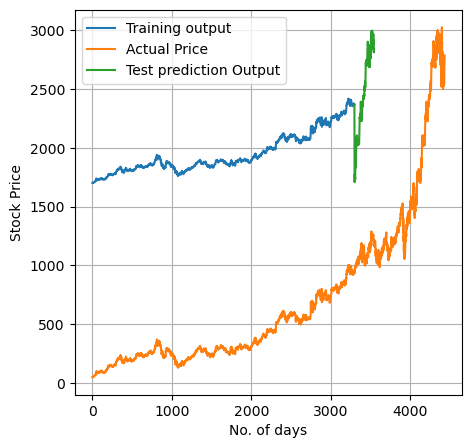

Learning rate: 0.01
iterations: 100
Pre-Processing the Data:


 Column used for predicting figures from 2021 onwards 
        Open
0  50.050049
1  50.555557
2  55.430431
3  55.675674
4  52.532532
Shapes:
 xTrain, yTrain, xTest, yTest (3296, 2, 1) (3296, 1) (245, 2, 1) (245, 1)
Predictions for the test data:
[0.03709291 0.01304995 0.00607826 0.03156609 0.05802285 0.05068746
 0.02991    0.02537155 0.03214471 0.02491867 0.05138859 0.11063747
 0.14549569 0.14922561 0.15427421 0.13767376 0.12177887 0.09939365
 0.1034053  0.12468148 0.19567833 0.27467316 0.27180741 0.28052591
 0.29599997 0.28466846 0.29085451 0.29240977 0.28925543 0.29606326
 0.29976292 0.30619469 0.29523161 0.25766556 0.24052894 0.25490272
 0.26255076 0.2530365  0.2663857  0.2722798  0.25700013 0.24812706
 0.27770537 0.28187669 0.26651638 0.27190987 0.27441078 0.27676189
 0.26506221 0.27667332 0.27332284 0.25842712 0.24824866 0.24997078
 0.25915466 0.26015276 0.24884549 0.24807674 0.25008458 0.26660839
 0.27603627 0.3085215

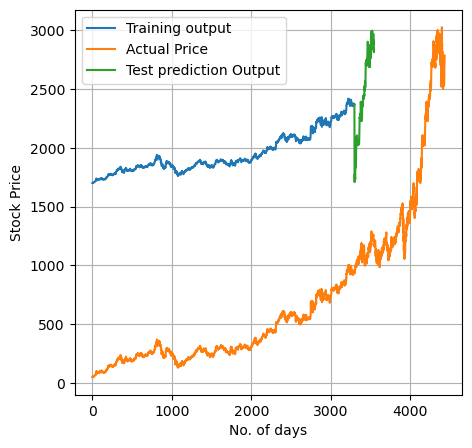

Learning rate: 0.01
iterations: 100
Pre-Processing the Data:


 Column used for predicting figures from 2021 onwards 
        Open
0  50.050049
1  50.555557
2  55.430431
3  55.675674
4  52.532532
Shapes:
 xTrain, yTrain, xTest, yTest (3296, 2, 1) (3296, 1) (245, 2, 1) (245, 1)
Predictions for the test data:
[0.03817269 0.01382072 0.00525147 0.02998947 0.05801512 0.05166316
 0.03046575 0.02469494 0.03275637 0.02447797 0.04878076 0.10851853
 0.14553359 0.1485316  0.15507537 0.13799022 0.12312137 0.09927886
 0.10305448 0.12252035 0.19088753 0.27477137 0.27178379 0.27920768
 0.29672331 0.28434934 0.29054904 0.29269867 0.28882195 0.2959321
 0.29935716 0.30604396 0.2968582  0.25884579 0.23997883 0.25404309
 0.26330537 0.25242148 0.26580558 0.27262461 0.25810168 0.24663365
 0.27693381 0.28288677 0.26609792 0.27195227 0.27378695 0.27768331
 0.26435247 0.27653841 0.27389795 0.25894801 0.24826235 0.2495349
 0.25873275 0.260806   0.24870828 0.24832503 0.24907237 0.2665086
 0.27479965 0.30674701 0

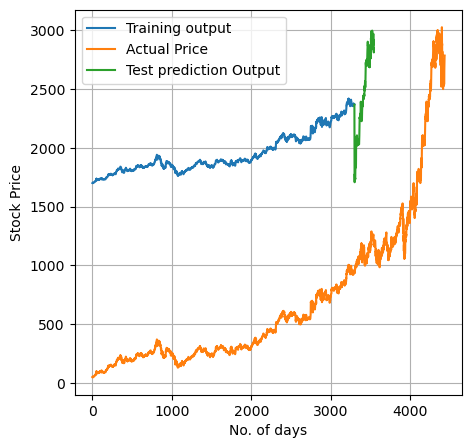

Learning rate: 0.01
iterations: 150
Pre-Processing the Data:


 Column used for predicting figures from 2021 onwards 
        Open
0  50.050049
1  50.555557
2  55.430431
3  55.675674
4  52.532532
Shapes:
 xTrain, yTrain, xTest, yTest (3296, 2, 1) (3296, 1) (245, 2, 1) (245, 1)
Predictions for the test data:
[0.03872816 0.01420841 0.00501297 0.02923476 0.05804947 0.05217639
 0.03075876 0.02437883 0.03307835 0.02427761 0.04753189 0.10754908
 0.1456479  0.14828838 0.15557086 0.13823641 0.12386174 0.09928776
 0.10294992 0.12153939 0.18865985 0.27500028 0.2719509  0.27874376
 0.29727371 0.28437956 0.29059005 0.29303303 0.28879894 0.29606226
 0.29935469 0.30617117 0.29785236 0.25959571 0.23986641 0.25378789
 0.26384916 0.25228537 0.26569542 0.27297324 0.25881246 0.24606228
 0.27673692 0.28356892 0.26606735 0.27215191 0.27366055 0.2783185
 0.26417768 0.27665398 0.27436054 0.25937414 0.24843231 0.24948488
 0.25869564 0.26129835 0.24880441 0.24861027 0.24873896 0.26663482
 0.27437292 0.30607709

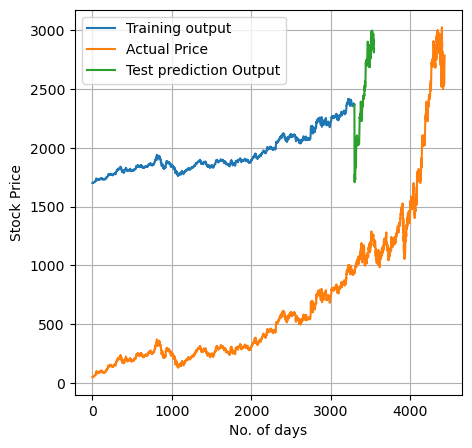

Learning rate: 0.01
iterations: 150
Pre-Processing the Data:


 Column used for predicting figures from 2021 onwards 
        Open
0  50.050049
1  50.555557
2  55.430431
3  55.675674
4  52.532532
Shapes:
 xTrain, yTrain, xTest, yTest (3296, 2, 1) (3296, 1) (245, 2, 1) (245, 1)
Predictions for the test data:
[0.04112911 0.01592295 0.00328579 0.02572472 0.05802934 0.05434505
 0.03199394 0.0228719  0.03443786 0.02329568 0.04172613 0.10282823
 0.14572491 0.14673648 0.15734589 0.1389337  0.12684304 0.0990273
 0.10216403 0.11672398 0.17798908 0.27520496 0.27188463 0.27579616
 0.29886841 0.28365505 0.28989562 0.29366116 0.28781974 0.29575544
 0.29843663 0.30582032 0.30145708 0.26220905 0.23863012 0.25186209
 0.26551513 0.250904   0.26439106 0.2737268  0.26125076 0.2427265
 0.27500596 0.28580241 0.26512272 0.27223254 0.2722585  0.28035496
 0.26258494 0.2763398  0.27562654 0.26052024 0.24845024 0.24850231
 0.25774369 0.26273888 0.24848652 0.24915028 0.24647388 0.2663993
 0.27160716 0.3021127  0

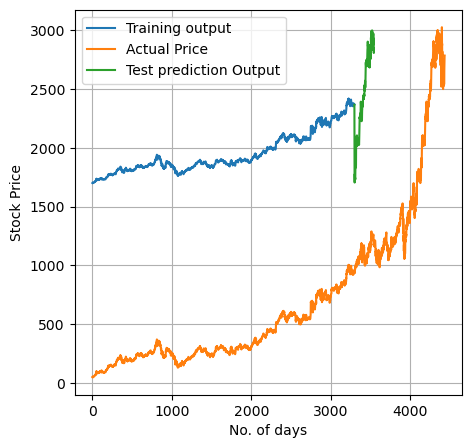

Pre-Processing the Data:


 Column used for predicting figures from 2021 onwards 
        High
0  52.082081
1  54.594597
2  56.796799
3  55.855858
4  54.054054
Shapes:
 xTrain, yTrain, xTest, yTest (3296, 2, 1) (3296, 1) (245, 2, 1) (245, 1)
Predictions for the test data:
[0.01104211 0.0016107  0.00724274 0.03091532 0.03984112 0.02787848
 0.01613448 0.0120401  0.01406089 0.01486577 0.06704299 0.12796496
 0.14026487 0.12839976 0.13691725 0.12595004 0.10768993 0.10327017
 0.0950391  0.14057404 0.19327268 0.27384815 0.25853012 0.27761148
 0.28481749 0.27560974 0.27477392 0.27320246 0.28606535 0.30691198
 0.29403146 0.29304845 0.28294385 0.25972671 0.25870189 0.26647318
 0.25781119 0.24711536 0.2621762  0.26858887 0.25772965 0.26370468
 0.28312015 0.27670678 0.24810974 0.25736101 0.27824496 0.25444832
 0.25426669 0.28417889 0.26943893 0.24561778 0.23017707 0.23991532
 0.24954348 0.24681027 0.23310543 0.23168666 0.24009707 0.25272497
 0.27659969 0.32442182 0.37672123 0.37969412 0.39482578 0

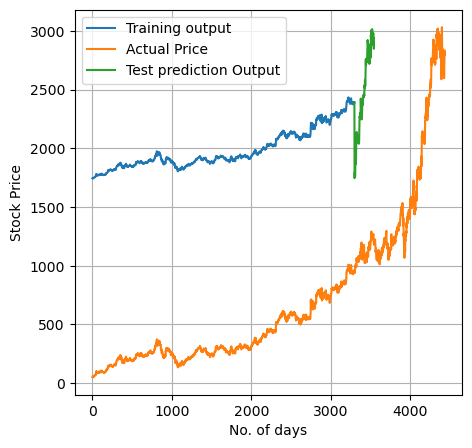

Learning rate: 0.01
iterations: 100
Pre-Processing the Data:


 Column used for predicting figures from 2021 onwards 
        High
0  52.082081
1  54.594597
2  56.796799
3  55.855858
4  54.054054
Shapes:
 xTrain, yTrain, xTest, yTest (3296, 2, 1) (3296, 1) (245, 2, 1) (245, 1)
Predictions for the test data:
[0.01024381 0.00146468 0.00898525 0.03203847 0.03909342 0.02704723
 0.0155521  0.01261984 0.01304492 0.01776137 0.07200397 0.12969667
 0.13891906 0.12936489 0.13668004 0.1242066  0.1081348  0.10124885
 0.09858339 0.14238812 0.20145442 0.27208045 0.26003913 0.27874157
 0.28412562 0.2757788  0.27467289 0.2736337  0.28856521 0.30591319
 0.29416844 0.29303287 0.28113335 0.25946596 0.25965528 0.26634502
 0.25659153 0.24826223 0.26326964 0.26777209 0.25779807 0.26547177
 0.28366156 0.27429863 0.24811539 0.2600625  0.27666765 0.25342507
 0.2574195  0.28357964 0.26803196 0.24412285 0.23088278 0.24085591
 0.24985859 0.24581676 0.23291134 0.23231717 0.24091911 0.25407418
 0.27929214 0.3293873

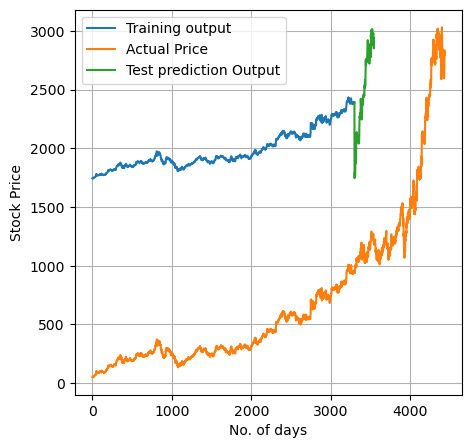

Learning rate: 0.01
iterations: 100
Pre-Processing the Data:


 Column used for predicting figures from 2021 onwards 
        High
0  52.082081
1  54.594597
2  56.796799
3  55.855858
4  54.054054
Shapes:
 xTrain, yTrain, xTest, yTest (3296, 2, 1) (3296, 1) (245, 2, 1) (245, 1)
Predictions for the test data:
[0.01191928 0.00177095 0.00564444 0.02970278 0.04067637 0.02879945
 0.01677814 0.01141239 0.01517723 0.01174488 0.06165487 0.12613269
 0.1418001  0.12740509 0.13723993 0.12791298 0.10725396 0.10552613
 0.09121155 0.13865765 0.18442491 0.27590623 0.25700173 0.27650586
 0.28570547 0.275553   0.27501182 0.27285821 0.28346736 0.30814548
 0.29401831 0.2932015  0.28505292 0.2601321  0.25778052 0.26673687
 0.25926319 0.24597726 0.26110346 0.26960577 0.25777453 0.26189677
 0.28266014 0.2794658  0.24821872 0.25452943 0.28009712 0.2556842
 0.25094068 0.2849654  0.27110092 0.24736479 0.22951302 0.23899921
 0.24931508 0.24801011 0.23342564 0.23110546 0.23931054 0.25136844
 0.27378693 0.31914821

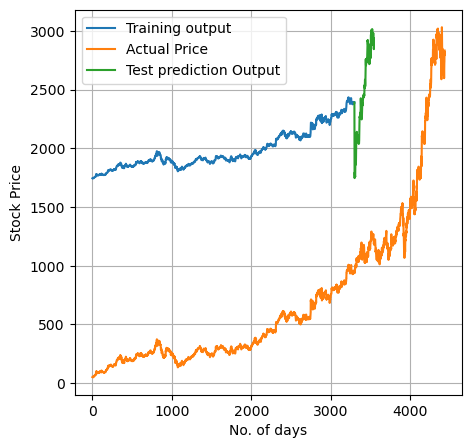

Learning rate: 0.01
iterations: 150
Pre-Processing the Data:


 Column used for predicting figures from 2021 onwards 
        High
0  52.082081
1  54.594597
2  56.796799
3  55.855858
4  54.054054
Shapes:
 xTrain, yTrain, xTest, yTest (3296, 2, 1) (3296, 1) (245, 2, 1) (245, 1)
Predictions for the test data:
[0.01172015 0.00173448 0.00597799 0.02998764 0.04049285 0.02859377
 0.01663369 0.01155903 0.01492382 0.01243742 0.06290605 0.12658002
 0.14147673 0.12766017 0.13719429 0.12748841 0.10737645 0.10502957
 0.0921102  0.13912692 0.18649674 0.27549056 0.25740642 0.27681743
 0.28556077 0.27562331 0.2750143  0.27299404 0.28412338 0.30792602
 0.29408244 0.29322726 0.28462743 0.26009299 0.25804586 0.2667317
 0.25898336 0.24628996 0.26140427 0.26942809 0.25781779 0.26236672
 0.28282461 0.27888977 0.24824526 0.25523312 0.27972965 0.25545329
 0.25175726 0.28484386 0.27077529 0.24701468 0.22971334 0.23925944
 0.24941939 0.2477859  0.23340056 0.23128707 0.23954105 0.25173246
 0.27449029 0.32042659

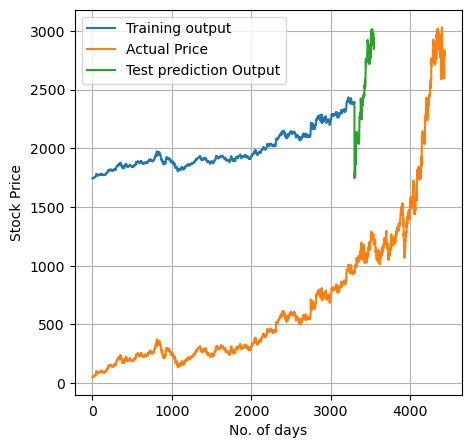

Learning rate: 0.01
iterations: 150
Pre-Processing the Data:


 Column used for predicting figures from 2021 onwards 
        High
0  52.082081
1  54.594597
2  56.796799
3  55.855858
4  54.054054
Shapes:
 xTrain, yTrain, xTest, yTest (3296, 2, 1) (3296, 1) (245, 2, 1) (245, 1)
Predictions for the test data:
[0.01157809 0.00170866 0.00607785 0.0301687  0.04034785 0.02843921
 0.01652678 0.01165408 0.01474302 0.01293048 0.06373396 0.12682667
 0.14118797 0.12777453 0.13709796 0.12713692 0.10740952 0.10463937
 0.09268259 0.13938266 0.18782865 0.27507499 0.25756182 0.27689979
 0.28532618 0.27554084 0.27488562 0.27295773 0.28443841 0.3076296
 0.29398698 0.29310591 0.28420081 0.25994288 0.25810542 0.26660171
 0.25866874 0.24638756 0.26148657 0.26917855 0.25772522 0.2625645
 0.28280328 0.27836266 0.24814577 0.25559452 0.27934512 0.25517389
 0.2521977  0.2846255  0.27042368 0.24665756 0.22974177 0.2393244
 0.24937265 0.24751472 0.23327272 0.23130192 0.23958551 0.25186267
 0.27484235 0.32115106 0

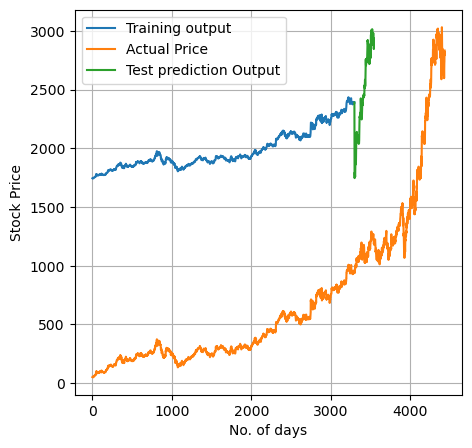

Pre-Processing the Data:


 Column used for predicting figures from 2021 onwards 
         Low
0  48.028027
1  50.300301
2  54.579578
3  51.836838
4  51.991993
Shapes:
 xTrain, yTrain, xTest, yTest (3296, 2, 1) (3296, 1) (245, 2, 1) (245, 1)
Predictions for the test data:
[0.01013081 0.01301456 0.00475093 0.02927463 0.04942919 0.03820667
 0.01752689 0.0241783  0.02117102 0.01545865 0.04210494 0.10562235
 0.14265079 0.13814307 0.12992306 0.12832293 0.0842117  0.10074836
 0.08899554 0.12549244 0.18075624 0.25115793 0.26695052 0.27834212
 0.28772569 0.28913452 0.28059748 0.2917265  0.29749059 0.30833892
 0.30698328 0.30856517 0.2968806  0.26576037 0.23539359 0.25547191
 0.24145804 0.24320628 0.26755863 0.27176931 0.23432798 0.24494299
 0.25542689 0.2460045  0.26251089 0.2580827  0.27758507 0.26183214
 0.26381625 0.28117508 0.26781862 0.24969571 0.24124346 0.25033928
 0.25925402 0.25478013 0.23539082 0.24049418 0.24625242 0.26714267
 0.28081614 0.31694939 0.35936686 0.39652149 0.40823288 0

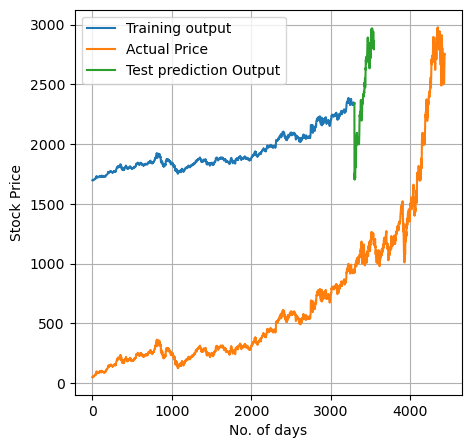

learning rate: 0.01
iterations: 100
Pre-Processing the Data:


 Column used for predicting figures from 2021 onwards 
         Low
0  48.028027
1  50.300301
2  54.579578
3  51.836838
4  51.991993
Shapes:
 xTrain, yTrain, xTest, yTest (3296, 2, 1) (3296, 1) (245, 2, 1) (245, 1)
Predictions for the test data:
[0.01016544 0.01293349 0.00490476 0.02939824 0.04938459 0.03806395
 0.0175644  0.0241685  0.02111248 0.01553494 0.04242252 0.1058257
 0.14260979 0.13804867 0.12995961 0.12799895 0.08432095 0.10061627
 0.08913885 0.12569868 0.18112182 0.25118619 0.26695042 0.27833378
 0.28769014 0.28900674 0.28060098 0.2916828  0.29749641 0.30826118
 0.30693738 0.3084629  0.29668464 0.26548683 0.23548449 0.25533887
 0.24138655 0.24328089 0.26758608 0.27147606 0.23432167 0.24497558
 0.25528802 0.24606721 0.26239433 0.25816814 0.27743611 0.26175956
 0.26387932 0.28105873 0.26766829 0.24958193 0.24123434 0.25033928
 0.25920318 0.25460253 0.23537047 0.24044955 0.24631618 0.26712727
 0.28092433 0.31708518

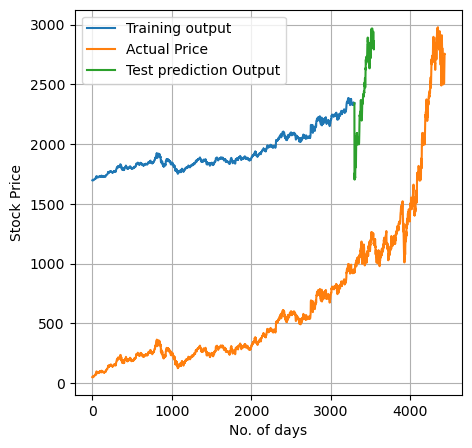

learning rate: 0.01
iterations: 100
Pre-Processing the Data:


 Column used for predicting figures from 2021 onwards 
         Low
0  48.028027
1  50.300301
2  54.579578
3  51.836838
4  51.991993
Shapes:
 xTrain, yTrain, xTest, yTest (3296, 2, 1) (3296, 1) (245, 2, 1) (245, 1)
Predictions for the test data:
[0.00988008 0.01352644 0.00398086 0.02839356 0.04962421 0.03907641
 0.01724182 0.02419386 0.02151649 0.01492027 0.0399092  0.10405526
 0.14263089 0.13848707 0.12941411 0.13021204 0.08331343 0.10141935
 0.08786127 0.1238654  0.17795756 0.25045561 0.2664043  0.27782726
 0.28737235 0.2893909  0.27999936 0.29141909 0.29684247 0.30822359
 0.3066592  0.30861229 0.29757397 0.26703282 0.23430752 0.25583222
 0.2414382  0.24221245 0.26682815 0.27316044 0.23388976 0.2442247
 0.255826   0.24508389 0.2627473  0.25698639 0.2780058  0.26177781
 0.2628568  0.28137184 0.26826847 0.24993995 0.24080975 0.24982637
 0.25906052 0.25543783 0.23504372 0.24029786 0.24532439 0.26669764
 0.27952219 0.31539806

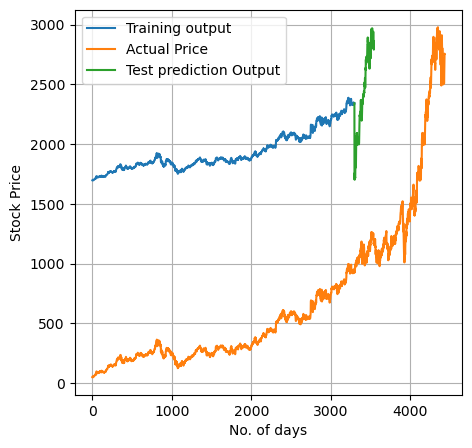

learning rate: 0.01
iterations: 150
Pre-Processing the Data:


 Column used for predicting figures from 2021 onwards 
         Low
0  48.028027
1  50.300301
2  54.579578
3  51.836838
4  51.991993
Shapes:
 xTrain, yTrain, xTest, yTest (3296, 2, 1) (3296, 1) (245, 2, 1) (245, 1)
Predictions for the test data:
[0.01030036 0.01264266 0.00529182 0.02987525 0.04925349 0.03756246
 0.01771505 0.02414881 0.02091055 0.01582752 0.04362535 0.10664967
 0.14255577 0.13779418 0.13018358 0.126889   0.08478245 0.10019685
 0.08972952 0.12654694 0.18259694 0.25146245 0.2671326  0.2784933
 0.28775549 0.28873211 0.28080581 0.29172076 0.29772136 0.30818465
 0.30697766 0.30829585 0.29616326 0.26465736 0.23598152 0.25502175
 0.24128739 0.24372302 0.26787053 0.2705778  0.23445863 0.24526356
 0.25494932 0.24646732 0.26214296 0.25866052 0.27707527 0.26167032
 0.26429291 0.2808209  0.26729571 0.24933205 0.24136563 0.2505105
 0.25919257 0.25412022 0.23545623 0.24044906 0.24672029 0.26725305
 0.28151633 0.31780394 

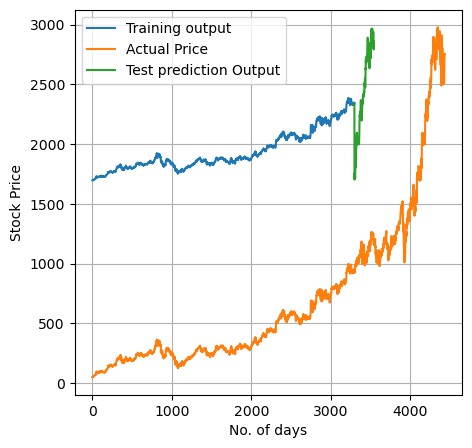

learning rate: 0.01
iterations: 150
Pre-Processing the Data:


 Column used for predicting figures from 2021 onwards 
         Low
0  48.028027
1  50.300301
2  54.579578
3  51.836838
4  51.991993
Shapes:
 xTrain, yTrain, xTest, yTest (3296, 2, 1) (3296, 1) (245, 2, 1) (245, 1)
Predictions for the test data:
[0.0104844  0.01223787 0.00587979 0.03052737 0.04906086 0.03686077
 0.01791908 0.02411596 0.02062665 0.0162281  0.04527717 0.1077633
 0.14244788 0.13741039 0.13046268 0.12532574 0.08540035 0.09959395
 0.09052474 0.1276895  0.18459258 0.25178551 0.26732201 0.27864875
 0.28777866 0.28828528 0.28102334 0.29170516 0.29796274 0.30800703
 0.3069617  0.30799312 0.29537377 0.26344952 0.23661325 0.2545241
 0.24109411 0.24427709 0.26820108 0.26927353 0.23459317 0.24560427
 0.25442187 0.24696266 0.26173448 0.25928053 0.27651206 0.26148596
 0.26480274 0.28042679 0.26671855 0.24892862 0.24149073 0.25068865
 0.25911743 0.25339451 0.2355198  0.2403923  0.24722112 0.26736449
 0.28226865 0.31872294 

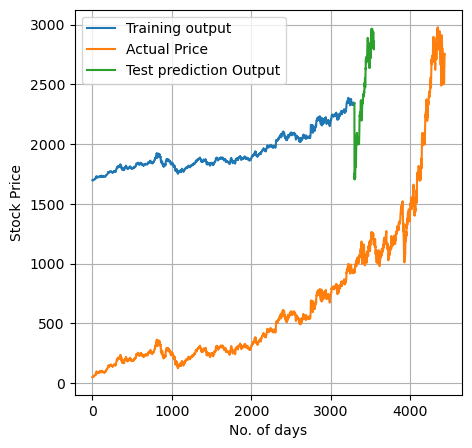

In [133]:
if __name__ == "__main__":
    data = pd.DataFrame(pd.read_csv(r"C:\Users\anany\Downloads\GOOGL.csv"))
    print(data.head(5))

    #Open Figure Predictions from 2021 onwards
    # Preprocess data and split into training and testing sets
    scaled_training_data, scaled_test_data, processed_data, min_max_scaler = data_processing_open(data)
    x_train, y_train, x_test, y_test = train_test_split_data(scaled_training_data, scaled_test_data)

    # Train the model
    train_results, hidden_output, hidden_neurons, input_to_hidden_weights, hidden_to_hidden_weights, hidden_to_output_weights = train_model(x_train, y_train, x_test, y_test)

    # Test the model
    test_results = test_model(x_test, hidden_output, hidden_neurons, input_to_hidden_weights, hidden_to_hidden_weights, hidden_to_output_weights)
     # Print predictions
    print("Predictions for the test data:")
    print(test_results)
    # Evaluating model performance and plotting results got
    
    model_error_performance(train_results, test_results, y_train, y_test, processed_data, min_max_scaler)
    #analysis and prediction
    helper_func_open(data)


    #High Figure Predictions from 2021 onwards
    #Preprocess data and split into training and testing sets
    scaled_training_data, scaled_test_data, processed_data, min_max_scaler = data_processing_high(data)
    x_train, y_train, x_test, y_test = train_test_split_data(scaled_training_data, scaled_test_data)

    # Train the model
    train_results, hidden_output, hidden_neurons, input_to_hidden_weights, hidden_to_hidden_weights, hidden_to_output_weights = train_model(x_train, y_train, x_test, y_test)

    # Test the model
    test_results = test_model(x_test, hidden_output, hidden_neurons, input_to_hidden_weights, hidden_to_hidden_weights, hidden_to_output_weights)
    # Print predictions
    print("Predictions for the test data:")
    print(test_results)
    # Evaluating model performance and plotting results got

    model_error_performance(train_results, test_results, y_train, y_test, processed_data, min_max_scaler)
    #analysis and prediction
    helper_func_high(data)


    #Low Figure Predictions from 2021 onwards
    # Preprocess data and split into training and testing sets
    scaled_training_data, scaled_test_data, processed_data, min_max_scaler = data_processing_low(data)
    x_train, y_train, x_test, y_test = train_test_split_data(scaled_training_data, scaled_test_data)

    # Train the model
    train_results, hidden_output, hidden_neurons, input_to_hidden_weights, hidden_to_hidden_weights, hidden_to_output_weights = train_model(x_train, y_train, x_test, y_test)

    # Test the model
    test_results = test_model(x_test, hidden_output, hidden_neurons, input_to_hidden_weights, hidden_to_hidden_weights, hidden_to_output_weights)
    # Print predictions
    print("Predictions for the test data:")
    print(test_results)

    # Evaluating model performance and plotting results got
    model_error_performance(train_results, test_results, y_train, y_test, processed_data, min_max_scaler)
    #analysis and prediction
    helper_func_low(data)
 
